Data loaded successfully!
Data shape: (17174, 6)

Column names:
['UID', 'GID_2', 'DATE', 'RAINFALL_MM', 'NDVI_VALUE', 'LST_VALUE']

First few rows:
                  UID      GID_2      DATE  RAINFALL_MM  NDVI_VALUE  LST_VALUE
0  MWI.1.1_1_1/1/2022  MWI.1.1_1  1/1/2022    15.441592    0.426636  37.395874
1  MWI.1.2_1_1/1/2022  MWI.1.2_1  1/1/2022    15.400904    0.467997  37.389273
2  MWI.1.3_1_1/1/2022  MWI.1.3_1  1/1/2022    15.429723    0.516458  37.697525
3  MWI.2.1_1_1/1/2022  MWI.2.1_1  1/1/2022    15.276362    0.400054  37.768977
4  MWI.2.2_1_1/1/2022  MWI.2.2_1  1/1/2022    15.423298    0.487241  37.840429

Adding placeholder columns for visualization...


C:\Users\PENDO\AppData\Local\Temp\ipykernel_16032\68468702.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax4.scatter(combined_df['NDVI_VALUE'], combined_df['LST_VALUE'],


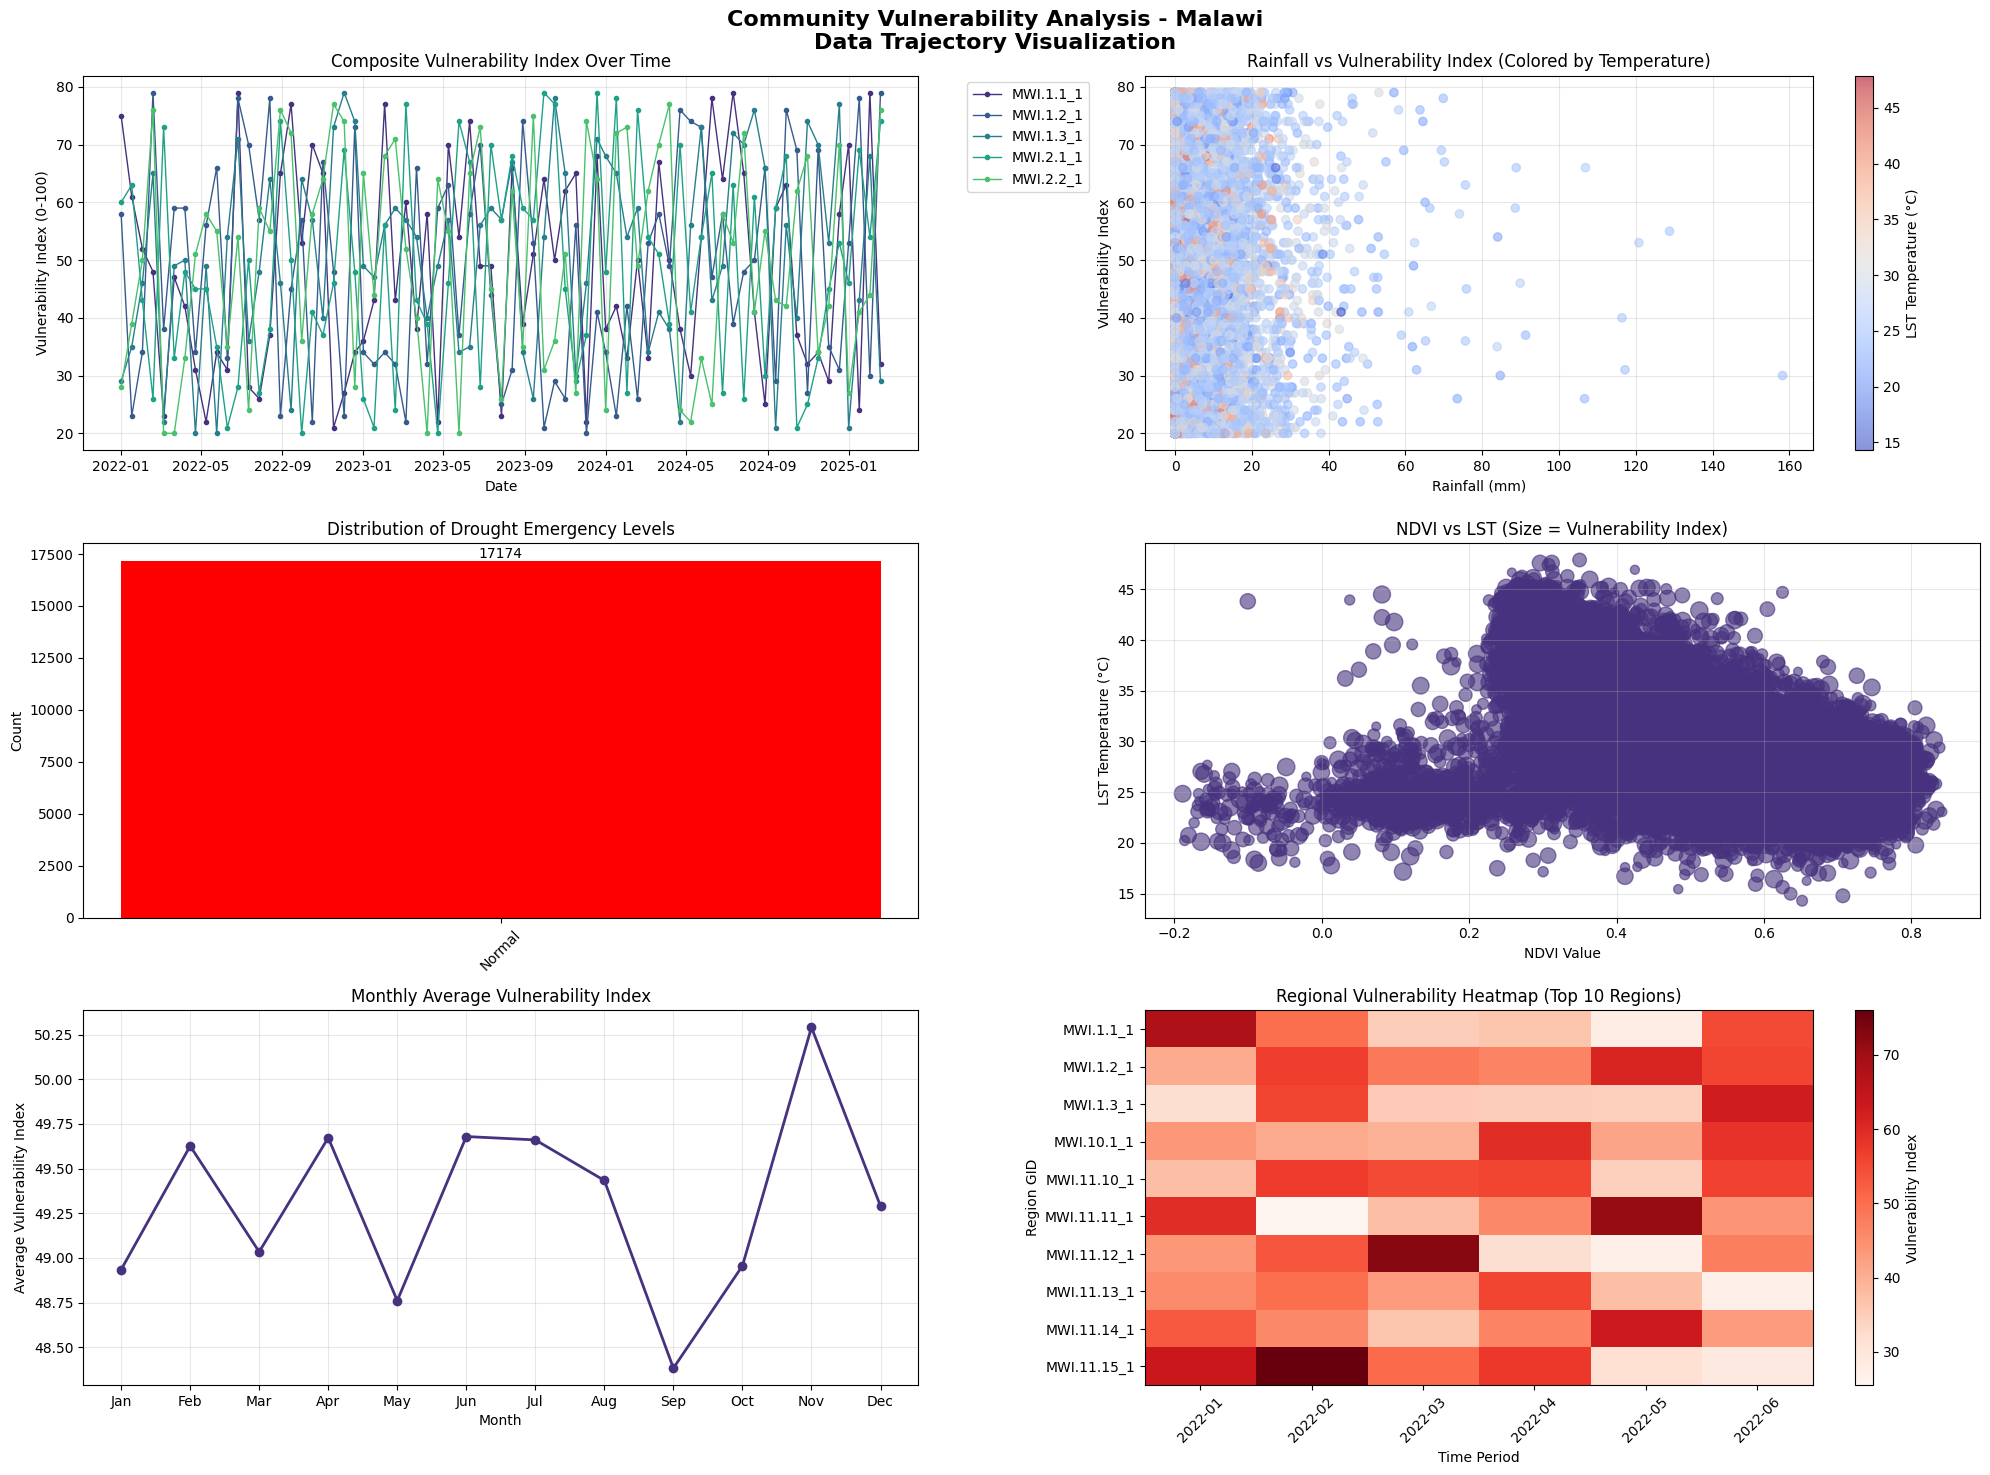

VULNERABILITY DATA SUMMARY STATISTICS
Total records: 17174
Time period: 2022-01-01 00:00:00 to 2025-02-18 00:00:00
Number of unique regions: 238

Vulnerability Index Statistics:
Mean: 49.3
Std Dev: 17.3
Min: 20.0
Max: 79.0

Drought Level Distribution:
  Normal: 17174 records (100.0%)

CORRELATION ANALYSIS
Correlation Matrix:
             RAINFALL_MM  NDVI_VALUE  LST_VALUE
RAINFALL_MM     1.000000    0.186357  -0.167375
NDVI_VALUE      0.186357    1.000000  -0.391846
LST_VALUE      -0.167375   -0.391846   1.000000

ALTERNATIVE READING METHOD
Alternative method - Data shape: (17174, 6)
Columns: ['UID', 'GID_2', 'DATE', 'RAINFALL_MM', 'NDVI_VALUE', 'LST_VALUE']


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set up the plotting style
plt.style.use('default')
sns.set_palette("viridis")

def plot_vulnerability_trajectory(combined_df):
    """
    Create comprehensive plots to visualize the trajectory of vulnerability data
    """
    
    # Convert DATE column to datetime
    combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle('Community Vulnerability Analysis - Malawi\nData Trajectory Visualization', 
                 fontsize=16, fontweight='bold')
    
    # 1. Time Series of Composite Vulnerability Index
    ax1 = axes[0, 0]
    for gid in combined_df['GID_2'].unique()[:5]:  # Plot first 5 regions for clarity
        region_data = combined_df[combined_df['GID_2'] == gid]
        ax1.plot(region_data['DATE'], region_data['COMPOSITE_VUL_INDEX'], 
                marker='o', markersize=3, linewidth=1, label=gid)
    ax1.set_title('Composite Vulnerability Index Over Time')
    ax1.set_ylabel('Vulnerability Index (0-100)')
    ax1.set_xlabel('Date')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # 2. Rainfall vs Vulnerability Scatter Plot
    ax2 = axes[0, 1]
    scatter = ax2.scatter(combined_df['RAINFALL_MM'], combined_df['COMPOSITE_VUL_INDEX'],
                         c=combined_df['LST_VALUE'], cmap='coolwarm', alpha=0.6)
    ax2.set_title('Rainfall vs Vulnerability Index (Colored by Temperature)')
    ax2.set_xlabel('Rainfall (mm)')
    ax2.set_ylabel('Vulnerability Index')
    plt.colorbar(scatter, ax=ax2, label='LST Temperature (°C)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Drought Levels Distribution
    ax3 = axes[1, 0]
    drought_counts = combined_df['DROUGHT_LEVELS'].value_counts()
    colors = ['red', 'orange', 'yellow', 'green']
    bars = ax3.bar(drought_counts.index, drought_counts.values, color=colors[:len(drought_counts)])
    ax3.set_title('Distribution of Drought Emergency Levels')
    ax3.set_ylabel('Count')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    # 4. NDVI vs LST with Vulnerability Size
    ax4 = axes[1, 1]
    scatter = ax4.scatter(combined_df['NDVI_VALUE'], combined_df['LST_VALUE'],
                         s=combined_df['COMPOSITE_VUL_INDEX']*2,  # Size represents vulnerability
                         alpha=0.6, cmap='viridis')
    ax4.set_title('NDVI vs LST (Size = Vulnerability Index)')
    ax4.set_xlabel('NDVI Value')
    ax4.set_ylabel('LST Temperature (°C)')
    ax4.grid(True, alpha=0.3)
    
    # 5. Monthly Average Vulnerability
    ax5 = axes[2, 0]
    monthly_avg = combined_df.groupby(combined_df['DATE'].dt.month)['COMPOSITE_VUL_INDEX'].mean()
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax5.plot(months[:len(monthly_avg)], monthly_avg.values, marker='o', linewidth=2)
    ax5.set_title('Monthly Average Vulnerability Index')
    ax5.set_xlabel('Month')
    ax5.set_ylabel('Average Vulnerability Index')
    ax5.grid(True, alpha=0.3)
    
    # 6. Regional Vulnerability Heatmap (Pivot)
    ax6 = axes[2, 1]
    # Create a pivot table for regional vulnerability over time
    pivot_data = combined_df.pivot_table(values='COMPOSITE_VUL_INDEX', 
                                       index='GID_2', 
                                       columns=combined_df['DATE'].dt.strftime('%Y-%m'),
                                       aggfunc='mean')
    
    # Plot heatmap for the first few time periods
    im = ax6.imshow(pivot_data.iloc[:10, :6], cmap='Reds', aspect='auto')
    ax6.set_title('Regional Vulnerability Heatmap (Top 10 Regions)')
    ax6.set_xlabel('Time Period')
    ax6.set_ylabel('Region GID')
    plt.colorbar(im, ax=ax6, label='Vulnerability Index')
    
    # Set x-tick labels for the first 6 columns
    ax6.set_xticks(range(min(6, len(pivot_data.columns))))
    ax6.set_xticklabels(pivot_data.columns[:6], rotation=45)
    ax6.set_yticks(range(len(pivot_data.index[:10])))
    ax6.set_yticklabels(pivot_data.index[:10])
    
    plt.tight_layout()
    plt.show()
    
    # Additional Statistical Analysis
    print("="*60)
    print("VULNERABILITY DATA SUMMARY STATISTICS")
    print("="*60)
    print(f"Total records: {len(combined_df)}")
    print(f"Time period: {combined_df['DATE'].min()} to {combined_df['DATE'].max()}")
    print(f"Number of unique regions: {combined_df['GID_2'].nunique()}")
    print(f"\nVulnerability Index Statistics:")
    print(f"Mean: {combined_df['COMPOSITE_VUL_INDEX'].mean():.1f}")
    print(f"Std Dev: {combined_df['COMPOSITE_VUL_INDEX'].std():.1f}")
    print(f"Min: {combined_df['COMPOSITE_VUL_INDEX'].min():.1f}")
    print(f"Max: {combined_df['COMPOSITE_VUL_INDEX'].max():.1f}")
    
    print(f"\nDrought Level Distribution:")
    for level, count in combined_df['DROUGHT_LEVELS'].value_counts().items():
        print(f"  {level}: {count} records ({count/len(combined_df)*100:.1f}%)")

# Load your actual dataset - FIXED VERSION
try:
    # Read the file with proper comma separation
    combined_df = pd.read_csv('rainfall_ndvi_lst_cleaned.csv')
    
    # Check if data was read into a single column (common issue with malformed CSVs)
    if combined_df.shape[1] == 1:
        print("Data read into single column - attempting to fix...")
        # Split the single column into multiple columns
        combined_df = combined_df.iloc[:, 0].str.split(',', expand=True)
        
        # Set column names from the first row
        combined_df.columns = combined_df.iloc[0]
        combined_df = combined_df[1:]  # Remove the header row
        combined_df = combined_df.reset_index(drop=True)
        
        # Convert data types
        combined_df['RAINFALL_MM'] = pd.to_numeric(combined_df['RAINFALL_MM'])
        combined_df['NDVI_VALUE'] = pd.to_numeric(combined_df['NDVI_VALUE'])
        combined_df['LST_VALUE'] = pd.to_numeric(combined_df['LST_VALUE'])
        
except Exception as e:
    print(f"Error reading file: {e}")

# Check if the dataframe was loaded successfully and has data
if 'combined_df' in locals() and not combined_df.empty:
    print("Data loaded successfully!")
    print(f"Data shape: {combined_df.shape}")
    print("\nColumn names:")
    print(combined_df.columns.tolist())
    print("\nFirst few rows:")
    print(combined_df.head())
    
    # Check if we have the required columns
    required_columns = ['UID', 'GID_2', 'DATE', 'RAINFALL_MM', 'NDVI_VALUE', 'LST_VALUE']
    
    missing_columns = [col for col in required_columns if col not in combined_df.columns]
    if missing_columns:
        print(f"\n⚠️  Missing columns: {missing_columns}")
        print("Please check your CSV column names and adjust the code accordingly")
    else:
        # Add the missing columns with placeholder data for visualization
        print("\nAdding placeholder columns for visualization...")
        combined_df['FARMING_WARNING_SYS'] = 'Monitoring: Stable conditions'
        combined_df['DROUGHT_LEVELS'] = 'Normal'
        combined_df['COMPOSITE_VUL_INDEX'] = np.random.randint(20, 80, len(combined_df))
        
        # Run the plotting function
        plot_vulnerability_trajectory(combined_df)
        
        # Additional: Correlation Analysis
        print("\n" + "="*60)
        print("CORRELATION ANALYSIS")
        print("="*60)
        correlation_matrix = combined_df[['RAINFALL_MM', 'NDVI_VALUE', 'LST_VALUE']].corr()
        print("Correlation Matrix:")
        print(correlation_matrix)
else:
    print("Failed to load data. Please check the file path and format.")

# Let's also try a different approach to read the file
print("\n" + "="*60)
print("ALTERNATIVE READING METHOD")
print("="*60)

# Try reading with different parameters
try:
    combined_df_alt = pd.read_csv('rainfall_ndvi_lst_cleaned.csv', engine='python')
    print("Alternative method - Data shape:", combined_df_alt.shape)
    print("Columns:", combined_df_alt.columns.tolist())
except Exception as e:
    print(f"Alternative method failed: {e}")

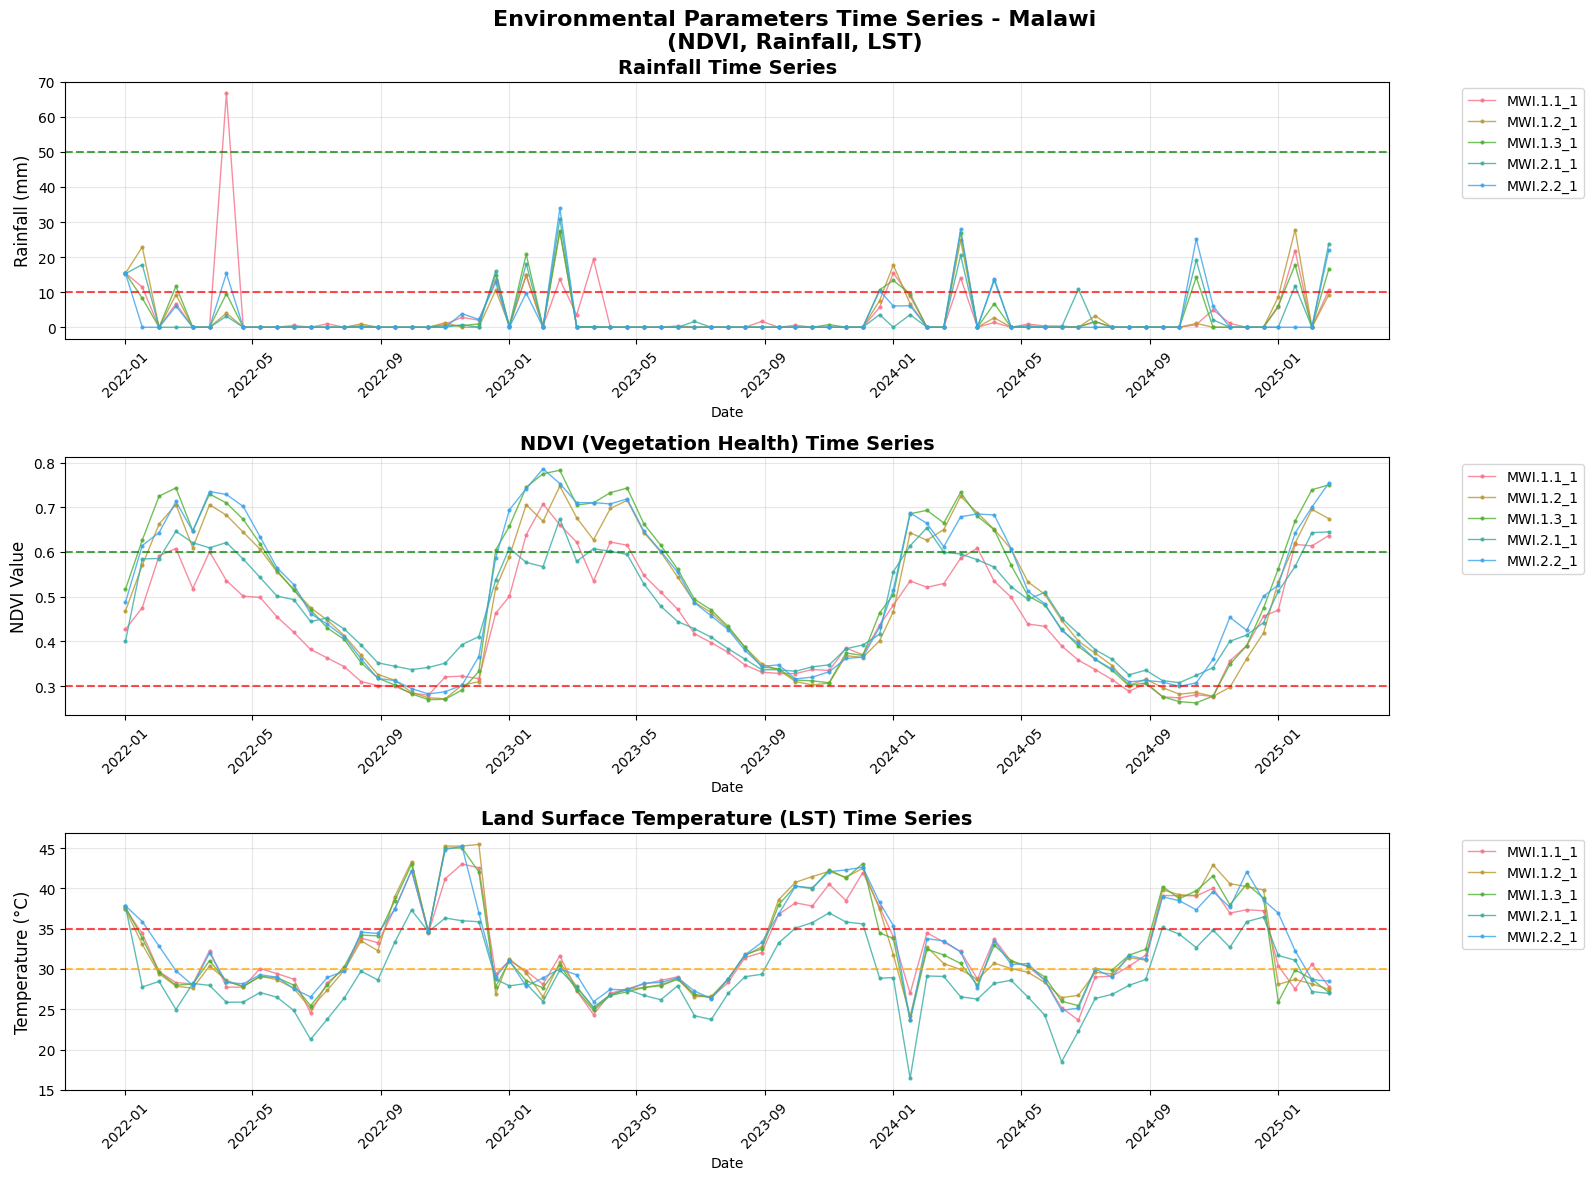

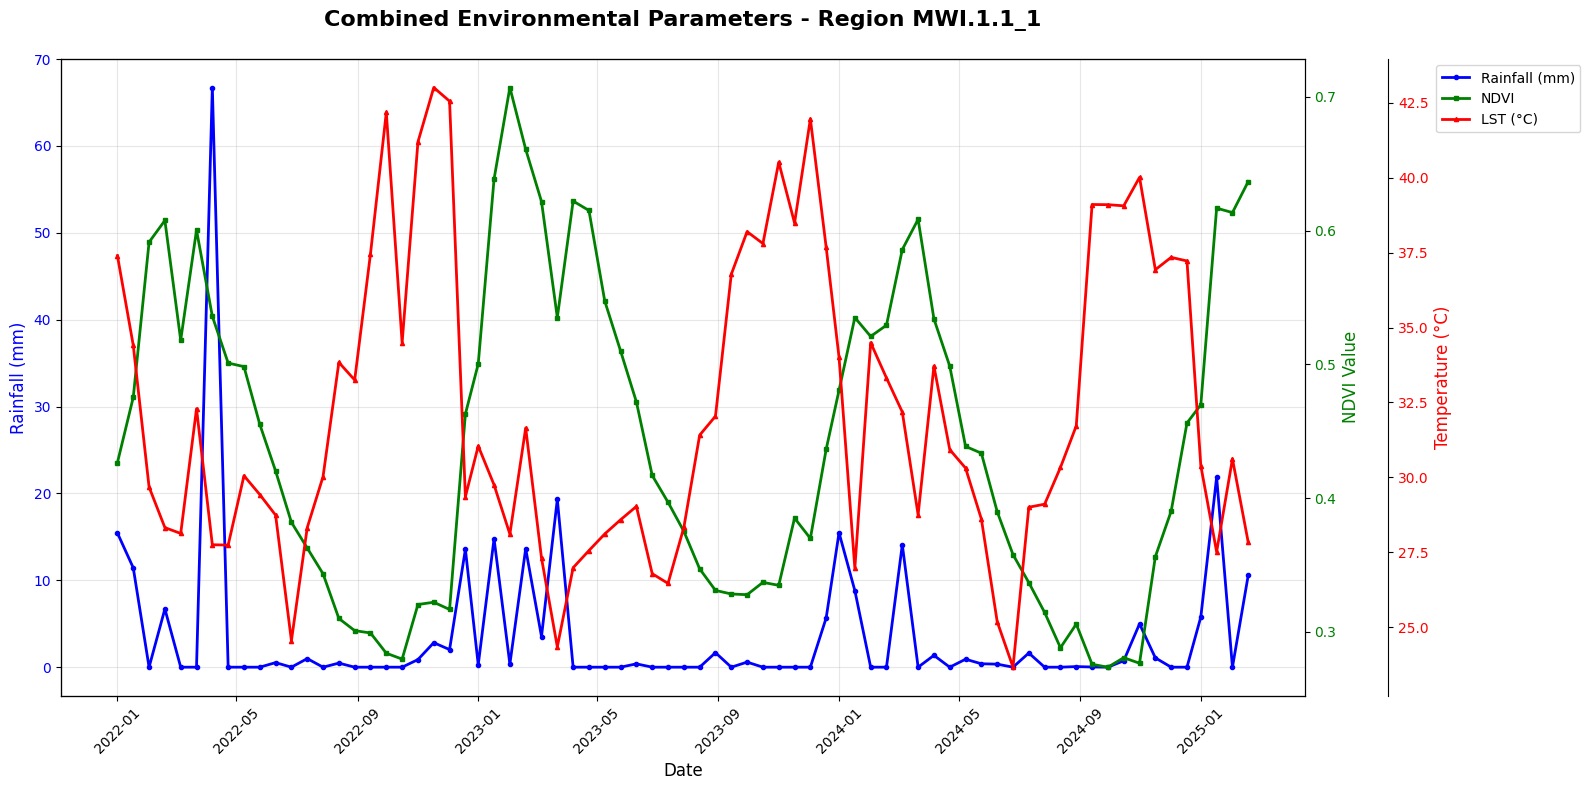

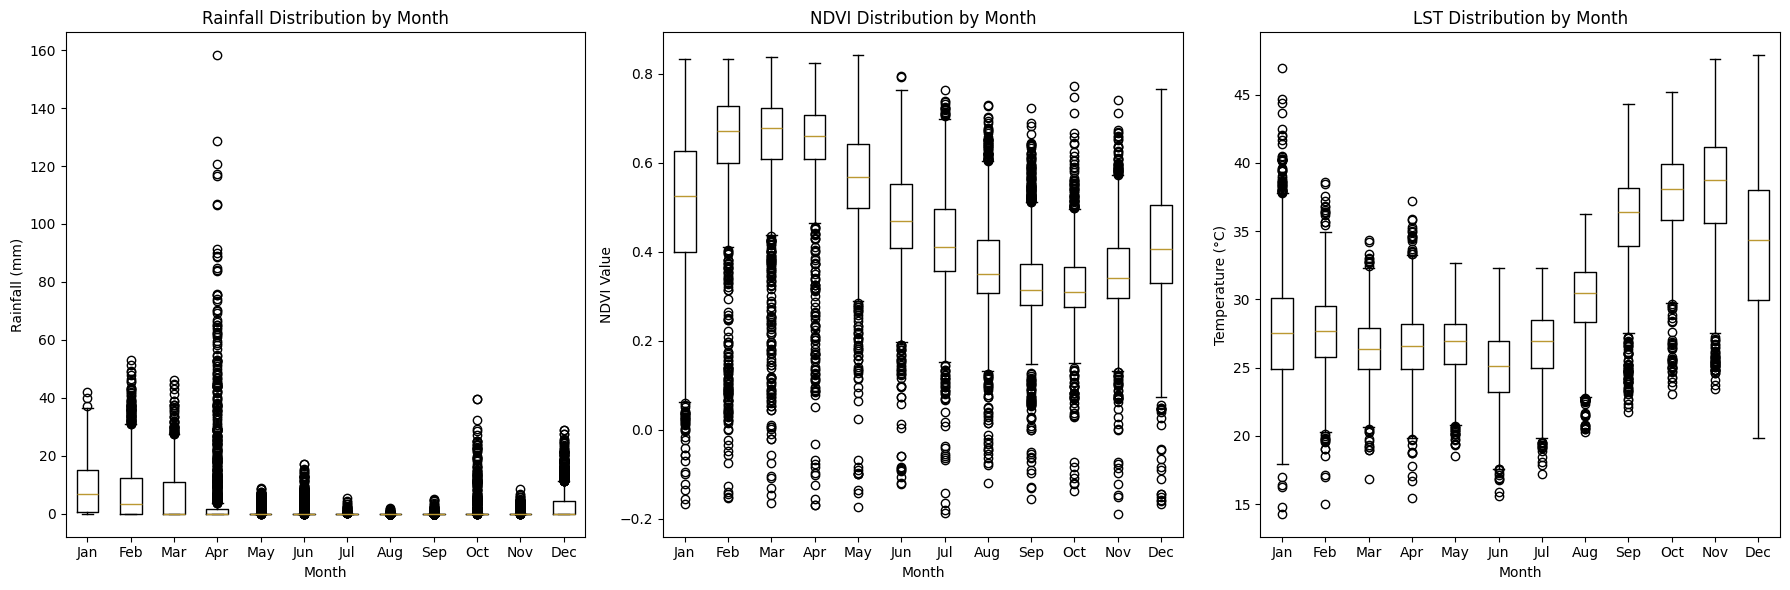

ENVIRONMENTAL PARAMETERS SUMMARY STATISTICS

RAINFALL_MM:
  Mean: 3.19
  Std Dev: 7.75
  Min: 0.00
  Max: 158.22
  25th percentile: 0.00
  75th percentile: 1.58

NDVI_VALUE:
  Mean: 0.48
  Std Dev: 0.18
  Min: -0.19
  Max: 0.84
  25th percentile: 0.34
  75th percentile: 0.63

LST_VALUE:
  Mean: 29.75
  Std Dev: 5.53
  Min: 14.29
  Max: 47.89
  25th percentile: 25.80
  75th percentile: 33.15

SEASONAL CORRELATION ANALYSIS


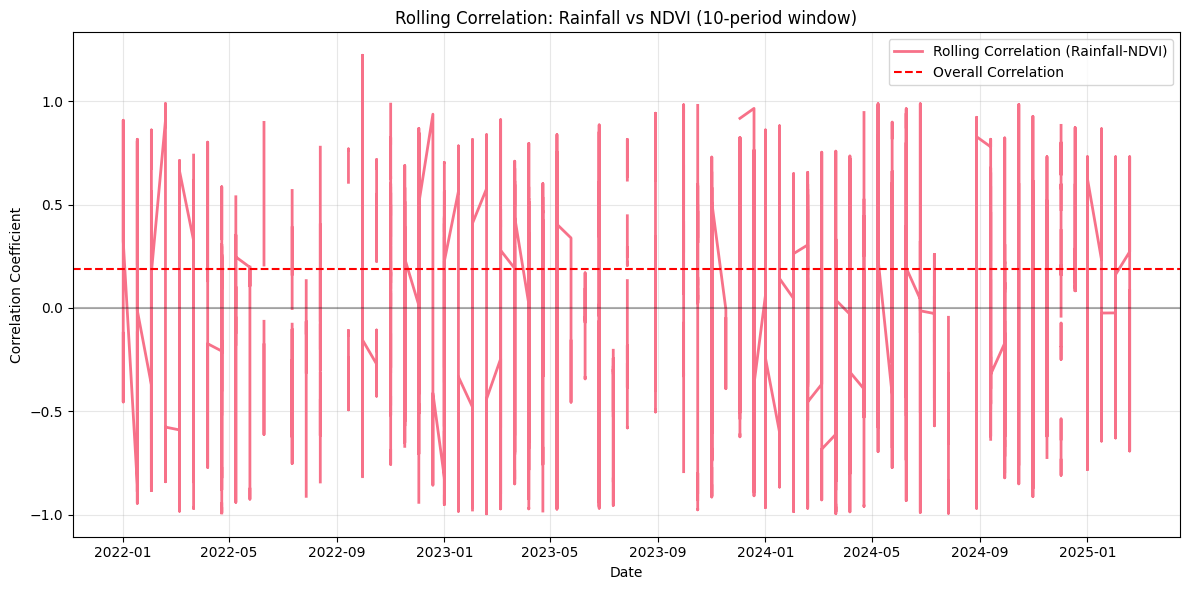

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

def plot_environmental_timeseries(combined_df, sample_regions=5):
    """
    Plot NDVI, Rainfall, and LST against time for multiple regions
    """
    
    # Convert DATE column to datetime
    combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    fig.suptitle('Environmental Parameters Time Series - Malawi\n(NDVI, Rainfall, LST)', 
                 fontsize=16, fontweight='bold')
    
    # Select sample regions for clearer visualization
    unique_regions = combined_df['GID_2'].unique()
    if len(unique_regions) > sample_regions:
        sample_regions_list = unique_regions[:sample_regions]
    else:
        sample_regions_list = unique_regions
    
    # 1. Rainfall Time Series
    ax1 = axes[0]
    for region in sample_regions_list:
        region_data = combined_df[combined_df['GID_2'] == region]
        ax1.plot(region_data['DATE'], region_data['RAINFALL_MM'], 
                marker='o', markersize=2, linewidth=1, label=region, alpha=0.8)
    
    ax1.set_title('Rainfall Time Series', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Rainfall (mm)', fontsize=12)
    ax1.set_xlabel('Date')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Add rainfall threshold lines
    ax1.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='Drought Threshold (10mm)')
    ax1.axhline(y=50, color='green', linestyle='--', alpha=0.7, label='Good Rainfall (50mm)')
    
    # 2. NDVI Time Series
    ax2 = axes[1]
    for region in sample_regions_list:
        region_data = combined_df[combined_df['GID_2'] == region]
        ax2.plot(region_data['DATE'], region_data['NDVI_VALUE'], 
                marker='o', markersize=2, linewidth=1, label=region, alpha=0.8)
    
    ax2.set_title('NDVI (Vegetation Health) Time Series', fontsize=14, fontweight='bold')
    ax2.set_ylabel('NDVI Value', fontsize=12)
    ax2.set_xlabel('Date')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # Add NDVI threshold lines
    ax2.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Stress Threshold (0.3)')
    ax2.axhline(y=0.6, color='green', linestyle='--', alpha=0.7, label='Healthy Vegetation (0.6)')
    
    # 3. LST Time Series
    ax3 = axes[2]
    for region in sample_regions_list:
        region_data = combined_df[combined_df['GID_2'] == region]
        ax3.plot(region_data['DATE'], region_data['LST_VALUE'], 
                marker='o', markersize=2, linewidth=1, label=region, alpha=0.8)
    
    ax3.set_title('Land Surface Temperature (LST) Time Series', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Temperature (°C)', fontsize=12)
    ax3.set_xlabel('Date')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # Add temperature threshold lines
    ax3.axhline(y=30, color='orange', linestyle='--', alpha=0.7, label='Heat Stress Threshold (30°C)')
    ax3.axhline(y=35, color='red', linestyle='--', alpha=0.7, label='Extreme Heat (35°C)')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Combined Plot for Single Region (for better comparison)
    fig2, ax4 = plt.subplots(figsize=(16, 8))
    
    # Plot first region as example
    example_region = sample_regions_list[0]
    region_data = combined_df[combined_df['GID_2'] == example_region].sort_values('DATE')
    
    # Plot all three parameters with different y-axes
    ax4.plot(region_data['DATE'], region_data['RAINFALL_MM'], 
             color='blue', marker='o', markersize=3, linewidth=2, label='Rainfall (mm)')
    ax4.set_ylabel('Rainfall (mm)', color='blue', fontsize=12)
    ax4.tick_params(axis='y', labelcolor='blue')
    
    ax5 = ax4.twinx()
    ax5.plot(region_data['DATE'], region_data['NDVI_VALUE'], 
             color='green', marker='s', markersize=3, linewidth=2, label='NDVI')
    ax5.set_ylabel('NDVI Value', color='green', fontsize=12)
    ax5.tick_params(axis='y', labelcolor='green')
    
    ax6 = ax4.twinx()
    ax6.spines['right'].set_position(('outward', 60))
    ax6.plot(region_data['DATE'], region_data['LST_VALUE'], 
             color='red', marker='^', markersize=3, linewidth=2, label='LST (°C)')
    ax6.set_ylabel('Temperature (°C)', color='red', fontsize=12)
    ax6.tick_params(axis='y', labelcolor='red')
    
    ax4.set_title(f'Combined Environmental Parameters - Region {example_region}\n', 
                 fontsize=16, fontweight='bold')
    ax4.set_xlabel('Date', fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    # Combine legends from all axes
    lines1, labels1 = ax4.get_legend_handles_labels()
    lines2, labels2 = ax5.get_legend_handles_labels()
    lines3, labels3 = ax6.get_legend_handles_labels()
    ax4.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, 
              loc='upper left', bbox_to_anchor=(1.1, 1))
    
    plt.tight_layout()
    plt.show()
    
    # 5. Seasonal Analysis Boxplots
    fig3, axes2 = plt.subplots(1, 3, figsize=(18, 6))
    
    # Extract month for seasonal analysis
    combined_df['MONTH'] = combined_df['DATE'].dt.month
    
    # Rainfall by month
    rainfall_data = [combined_df[combined_df['MONTH'] == month]['RAINFALL_MM'] 
                    for month in range(1, 13)]
    axes2[0].boxplot(rainfall_data)
    axes2[0].set_title('Rainfall Distribution by Month')
    axes2[0].set_ylabel('Rainfall (mm)')
    axes2[0].set_xlabel('Month')
    axes2[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # NDVI by month
    ndvi_data = [combined_df[combined_df['MONTH'] == month]['NDVI_VALUE'] 
                for month in range(1, 13)]
    axes2[1].boxplot(ndvi_data)
    axes2[1].set_title('NDVI Distribution by Month')
    axes2[1].set_ylabel('NDVI Value')
    axes2[1].set_xlabel('Month')
    axes2[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # LST by month
    lst_data = [combined_df[combined_df['MONTH'] == month]['LST_VALUE'] 
               for month in range(1, 13)]
    axes2[2].boxplot(lst_data)
    axes2[2].set_title('LST Distribution by Month')
    axes2[2].set_ylabel('Temperature (°C)')
    axes2[2].set_xlabel('Month')
    axes2[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.tight_layout()
    plt.show()
    
    # Statistical Summary
    print("="*60)
    print("ENVIRONMENTAL PARAMETERS SUMMARY STATISTICS")
    print("="*60)
    
    for param in ['RAINFALL_MM', 'NDVI_VALUE', 'LST_VALUE']:
        print(f"\n{param}:")
        print(f"  Mean: {combined_df[param].mean():.2f}")
        print(f"  Std Dev: {combined_df[param].std():.2f}")
        print(f"  Min: {combined_df[param].min():.2f}")
        print(f"  Max: {combined_df[param].max():.2f}")
        print(f"  25th percentile: {combined_df[param].quantile(0.25):.2f}")
        print(f"  75th percentile: {combined_df[param].quantile(0.75):.2f}")

# Load your data (assuming it's already loaded as combined_df)
# If not, load it first:
# combined_df = pd.read_csv('rainfall_ndvi_lst_cleaned.csv')

# Run the plotting function
plot_environmental_timeseries(combined_df)

# Additional: Correlation over time analysis
print("\n" + "="*60)
print("SEASONAL CORRELATION ANALYSIS")
print("="*60)

# Calculate rolling correlations
combined_df = combined_df.sort_values('DATE')
rolling_corr = combined_df['RAINFALL_MM'].rolling(window=10).corr(combined_df['NDVI_VALUE'])

plt.figure(figsize=(12, 6))
plt.plot(combined_df['DATE'], rolling_corr, label='Rolling Correlation (Rainfall-NDVI)', linewidth=2)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=combined_df['RAINFALL_MM'].corr(combined_df['NDVI_VALUE']), 
           color='red', linestyle='--', label='Overall Correlation')
plt.title('Rolling Correlation: Rainfall vs NDVI (10-period window)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()